# ANN Implementation using Keras and PyTorch

## Importing Packages 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

## Preprocessing

In [6]:
data = pd.read_csv(r"/home/surya/Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.drop(['ID'],axis =1,inplace = True)
data.drop(['ZIP Code'],axis =1,inplace = True)

In [8]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Taking 'Personal_loan' column as target

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

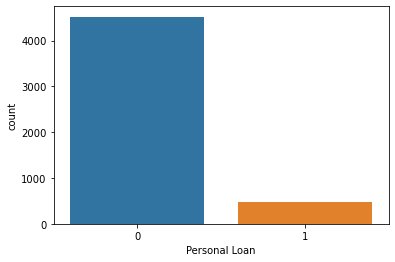

In [9]:
sns.countplot(data['Personal Loan'])

Text(0, 0.5, 'Age')

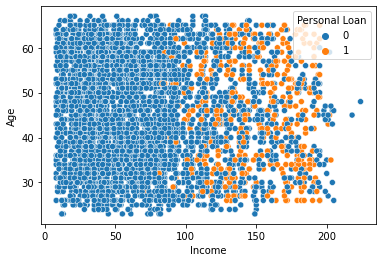

In [10]:
sns.scatterplot(x='Income', y='Age', hue='Personal Loan', data=data)
plt.xlabel('Income')
plt.ylabel('Age')

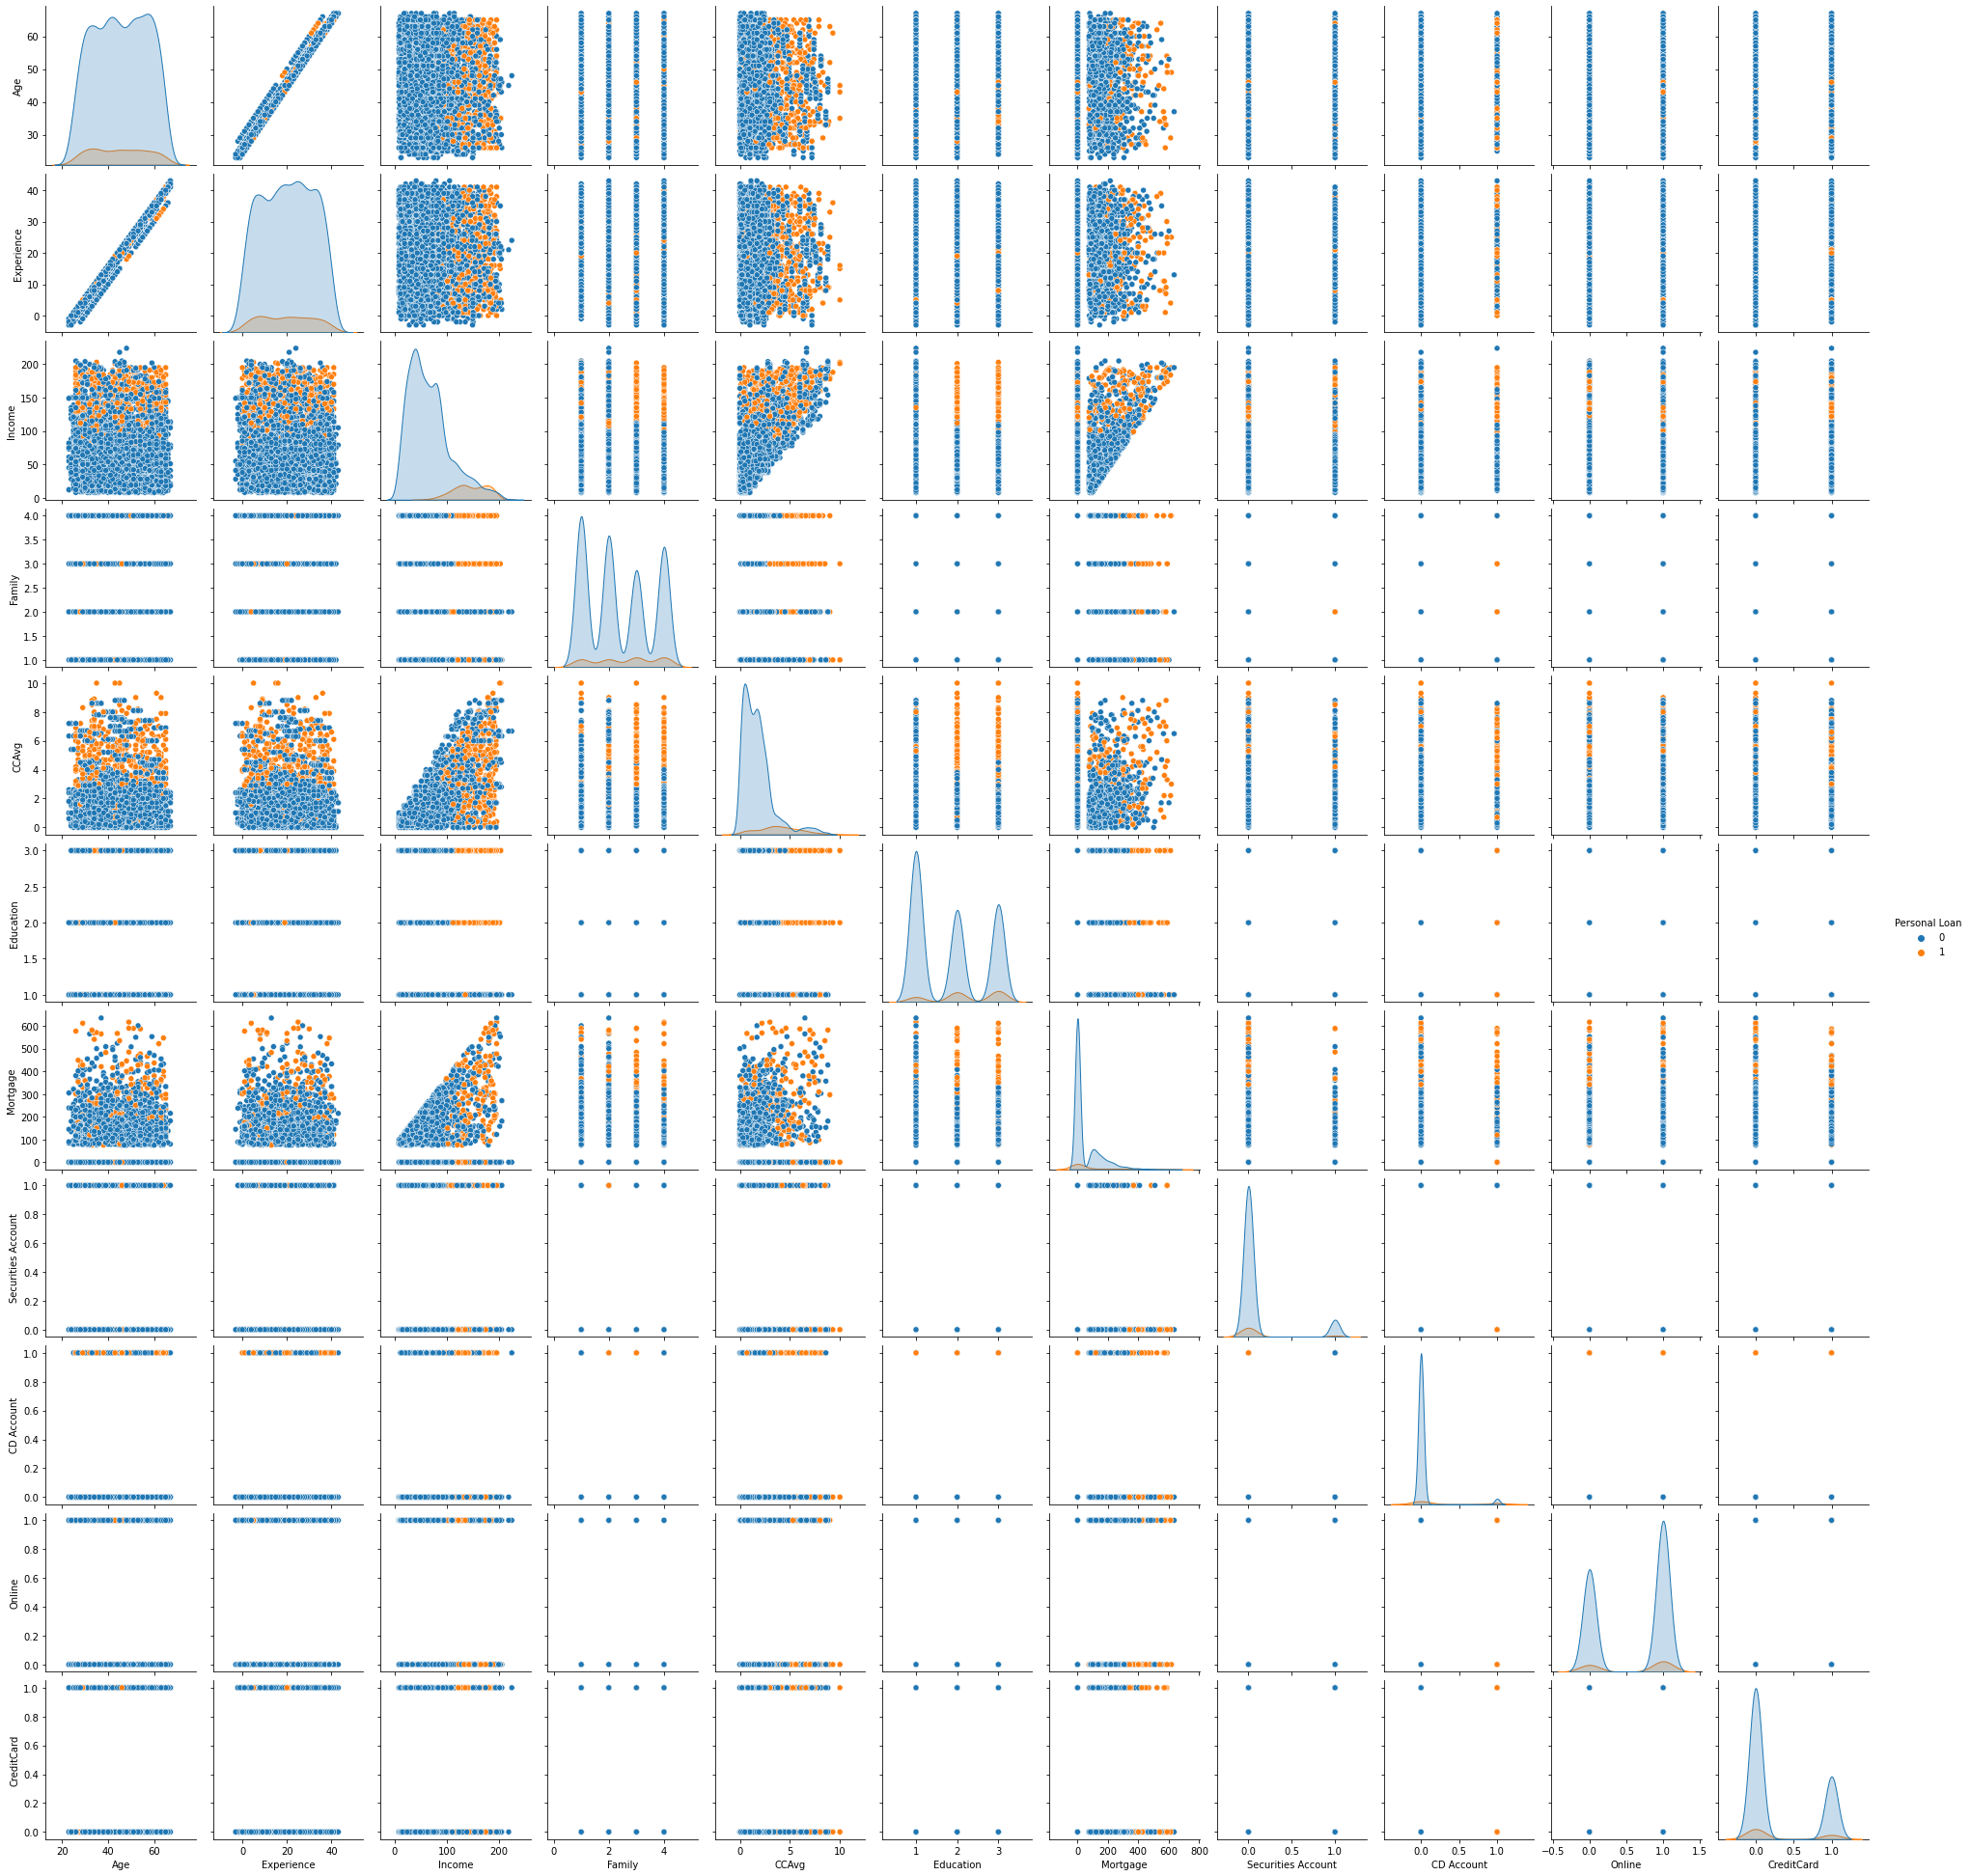

In [11]:
sns.pairplot(data,hue='Personal Loan')

### Getting target shape

In [12]:
data['Personal Loan'].nunique()
data.shape

(5000, 12)

In [20]:
x = data.iloc[:,:]
x.shape

(5000, 12)

In [21]:
y  = data.iloc[:,8]
y.shape

(5000,)

### Standardizing

In [22]:
std = StandardScaler()
x_std= std.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.33, random_state=42, stratify = y)
x_train, x_test, y_train.values, y_test.values

(array([[ 1.54088033,  1.64783451,  0.5914907 , ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 1.27914634,  1.21179333,  0.61321608, ..., -0.25354028,
          0.82195086,  1.54963239],
        [-1.1637042 , -1.05562082,  0.52631458, ..., -0.25354028,
          0.82195086, -0.64531434],
        ...,
        [ 0.58118904,  0.51412744,  2.61195054, ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 1.27914634,  1.21179333, -0.97273627, ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 0.40669972,  0.33971096,  2.28606993, ..., -0.25354028,
          0.82195086, -0.64531434]]),
 array([[-0.11676826, -0.00912198,  2.3077953 , ..., -0.25354028,
         -1.21661774,  1.54963239],
        [-1.33819353, -1.40445376, -1.05963777, ..., -0.25354028,
         -1.21661774, -0.64531434],
        [-0.72748089, -0.61957964, -0.21234816, ..., -0.25354028,
          0.82195086, -0.64531434],
        ...,
        [ 0.66843371,  0.77575215,  1.46050569, ..., -

## NN using Keras

### Importing Tensorflow Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

2023-03-23 23:42:27.718192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 23:42:28.406410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Defining Keras Model

In [29]:
model = Sequential()
model.add(Dense(11, input_shape=(12,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling our Model

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(x, y, epochs=10, batch_size=10)

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.1259 - accuracy: 0.9800
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9950
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 2.5569e-04 - accuracy: 1.0000
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 7.9338e-05 - accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 3.1505e-05 - accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 1.7296e-05 - accuracy: 1.0000
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 9.9441e-06 - accuracy: 1.0000
Epoch 9/10
500/500 [==============================] - 1s 3ms/step - loss: 6.6330e-06 - accuracy: 1.0000
Epoch 10/10
500/500 [==============================] - 1s 3ms/step - loss: 4

### Finding Accuracy

In [61]:
accuracy = model.evaluate(x, y)
accuracy_tf = accuracy[1]*100
print("The accuracy of NN model using keras is {} percent".format(accuracy[1]*100))

157/157 [==============================] - 0s 2ms/step - loss: 3.6087e-06 - accuracy: 1.0000
The accuracy of NN model using keras is 100.0 percent


## NN using PyTorch

### Importing Packages

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Transforming Arrays into Tensors

In [39]:
y_train = np.array(y_train)
y_test = np.array(y_test) 
x_train= torch.FloatTensor(x_train)
x_test= torch.FloatTensor(x_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)


In [40]:
type(y_test),type(x_test)

(torch.Tensor, torch.Tensor)

### Defining Subclass('NN_pt') from nn.Module which is base class for NN modules

In [41]:
class NN_pt(nn.Module):
    def __init__(self,input_features=12,hidden1=64,hidden2=75,hidden3=32,hidden4=16,hidden5=8,out_features=1):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.f_connected3=nn.Linear(hidden2,hidden3)
        self.f_connected4=nn.Linear(hidden3,hidden4)
        self.f_connected5=nn.Linear(hidden4,hidden5)
        self.out=nn.Linear(hidden5,out_features)  #defining hidden layers similar to our keras model
    def forward(self,h):
        h = F.relu(self.f_connected1(h))
        h = F.relu(self.f_connected2(h))
        h = F.relu(self.f_connected3(h))
        h = F.relu(self.f_connected4(h))
        h = F.relu(self.f_connected5(h))
        h = F.sigmoid(self.out(h))
        return h

In [42]:
torch.manual_seed(0) #Prevent Randomness
model1=NN_pt()

### Checking Parameters

In [43]:
model1.parameters

<bound method Module.parameters of NN_pt(
  (f_connected1): Linear(in_features=12, out_features=64, bias=True)
  (f_connected2): Linear(in_features=64, out_features=75, bias=True)
  (f_connected3): Linear(in_features=75, out_features=32, bias=True)
  (f_connected4): Linear(in_features=32, out_features=16, bias=True)
  (f_connected5): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)>

### Loss-Function used - Binary Cross Entropy

In [44]:
loss_function= nn.BCELoss()

### Optimization Function used - Adam Optimizer

In [45]:
optimizer = torch.optim.Adam(model1.parameters(),lr=0.01)

### Running our Model

In [49]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [51]:
epochs = 10
losslist = []
for i in range(epochs):
    i+=1
    y_pred = model1.forward(x_train)
    y_pred = y_pred.reshape(y_train.shape)
    loss = loss_function(y_pred,y_train)
    losslist.append(loss)
    print('Epoch Numner : {} and the loss : {}'.format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Numner : 1 and the loss : 0.7731645107269287
Epoch Numner : 2 and the loss : 0.7497797608375549
Epoch Numner : 3 and the loss : 0.7433401942253113
Epoch Numner : 4 and the loss : 0.7369356155395508
Epoch Numner : 5 and the loss : 0.7322817444801331
Epoch Numner : 6 and the loss : 0.7273786664009094
Epoch Numner : 7 and the loss : 0.7218707799911499
Epoch Numner : 8 and the loss : 0.7157204747200012
Epoch Numner : 9 and the loss : 0.7086668610572815
Epoch Numner : 10 and the loss : 0.7003375887870789


In [52]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_p = model1(data)
        predictions.append(y_p.argmax().item())


### Finding Accuracy

In [53]:
accuracy_score= accuracy_score(y_test,predictions)
print("The accuracy of your model is {} percent".format(accuracy_score*100))

The accuracy of your model is 89.57575757575758 percent


In [63]:
results=pd.DataFrame({'Model':['Keras','PyTorch'],
                     'Accuracy Score':[ accuracy_tf, accuracy_score*100]})


results

,Model,Accuracy Score
0,Keras,100.000000
1,PyTorch,89.575758
